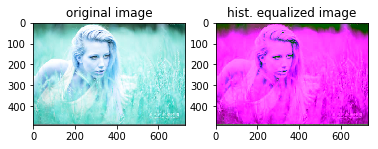

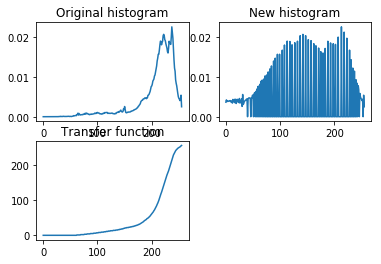

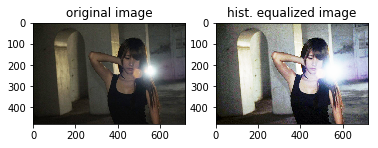

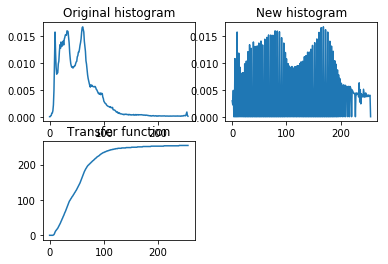

In [3]:
#!/usr/bin/env python
# coding: utf-8
import numpy as np 
import pylab as plt
import matplotlib.image as mpimg
import cv2


def imhist(im):
  # calculates normalized histogram of an image
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	return np.array(h)/(m*n)

def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)
	#return transformed image, original and new istogram, 
	# and transform function
	return Y , h, H, sk

#================================================
#=========Main program===========================

img = cv2.imread("b9.jpg")
if img.ndim > 1:
    (rows, cols, c) = img.shape
else:
    (rows, cols) = img.shape
    c=1

imgYcc = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)

new_img = np.zeros((rows, cols, c), np.uint8)

result, h, new_h, sk = histeq(imgYcc[:,:,0])
new_img[:,:,0] = result
new_img[:,:,1] = imgYcc[:,:,1]
new_img[:,:,2] = imgYcc[:,:,2]
new_img = cv2.cvtColor(img, cv2.COLOR_YCR_CB2RGB)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()


img2 = cv2.imread("b8.jpg")
if img2.ndim > 1:
    (rows, cols, c) = img2.shape
else:
    (rows, cols) = img2.shape
    c=1
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

new_img2 = np.zeros((rows, cols, c), np.uint8)


for i in range(c):
    result, h, new_h, sk = histeq(img2[:,:,i])
    new_img2[:,:,i] = result
plt.subplot(121)
plt.imshow(img2)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img2)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()


fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') 

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram')

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') 

plt.show()




